In [8]:
import torch
from models.Models import Models

In [9]:
Models.available.keys()

dict_keys(['lenet5', 'resnet32', 'resnet18', 'mobilenetv3', 'vgg'])

AttributeError: module 'models.Models' has no attribute 'available'

In [11]:
import random

def generate_list(n, values):
    # Check if the desired size is larger than the available values
    if n > len(values):
        raise ValueError("Desired size is larger than the available values.")

    # Generate a random sample of size n from the values
    return random.sample(values, n)

# Example usage
# available_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
desired_size = 6

result = generate_list(desired_size, list(Models.available.keys()))
print(result)

ValueError: Desired size is larger than the available values.

In [12]:
def generate(model_list, num_clients):
    strategy = [None] * num_clients
    for i in range(num_clients):
        strategy[i] = random.choice(model_list)
    return strategy

In [18]:
generate(list(Models.available.keys()), 10)

['mobilenetv3',
 'resnet18',
 'lenet5',
 'lenet5',
 'resnet32',
 'resnet18',
 'resnet32',
 'vgg',
 'vgg',
 'lenet5']

In [21]:
import random
def generate(model_list, num_clients):
    return random.choices(model_list, k=num_clients)

In [30]:
strategy = generate(list(Models.available.values()), 10)

In [37]:
num_clients = 5

In [40]:
[Models.ResNet18] * (num_clients // 2) + [Models.ResNet32] * (num_clients - (num_clients // 2))

[<function models.Models.Models.ResNet18()>,
 <function models.Models.Models.ResNet18()>,
 <function models.Models.Models.ResNet32()>,
 <function models.Models.Models.ResNet32()>,
 <function models.Models.Models.ResNet32()>]

In [34]:
random.choice(list(Models.available.values()))()

models.vgg.VGG19

In [1]:
foo = [1,2,3,4,5,6,7,8,9,10]

In [3]:
foo[1:]

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
device_ids = [0, 1, 2, 3]  # List of GPU device IDs to use

for i, (model, device_id) in enumerate(zip(["model1", "model2", "model3", "model4", "model5", "model6", "model7", "model8"], device_ids)):
    print(model, device_id)

model1 0
model2 1
model3 2
model4 3


In [5]:
import torch
from torchvision.datasets import ImageFolder    
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.datasets import CIFAR10


In [131]:
train_transform = transforms.Compose([
            transforms.Resize((32,32)),
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            # transforms.Normalize(mean=self.mean, std=self.std),
        ])
dataset = CIFAR10('dataset/',train=True, download=True, transform=train_transform)

Files already downloaded and verified


In [17]:
dataset.train_list

[['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
 ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
 ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
 ['data_batch_4', '634d18415352ddfa80567beed471001a'],
 ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb']]

In [ ]:
def random_split(self, training_data):
    """
    Splits training data into client datasets based on num_clients and splitting strategy
    
    Args:
        training_data (torch.utils.data.Dataset): training data
    Returns:
        client_data (list): list of client datasets
    """
    if self.equal_split:
        return random_split(training_data, [len(training_data) // self.num_clients] * self.num_clients)
    
def homogeneous_split(self, trainig_data):
    return None
    
def dirichlet_split(self, training_data):
    return None


In [132]:
from torchvision import datasets, transforms
from torch.utils.data import Subset, random_split

def create_balanced_subsets(dataset, num_subsets):
    # Calculate the number of samples per class in each subset
    samples_per_class = len(dataset) // num_subsets
    remainder = len(dataset) % num_subsets

    # Split the original dataset into num_subsets subsets with balanced classes
    class_counts = [0] * 10  # CIFAR10 has 10 classes
    subset_indices = [[] for _ in range(num_subsets)]
    for i, (data, target) in enumerate(dataset):
        if class_counts[target] < samples_per_class:
            subset_indices[i % num_subsets].append(i)
            class_counts[target] += 1
        elif remainder > 0:
            subset_indices[i % num_subsets].append(i)
            class_counts[target] += 1
            remainder -= 1

    # Create Subset objects for each subset
    subsets = [Subset(dataset, indices) for indices in subset_indices]

    return subsets


In [133]:
subsets = create_balanced_subsets(dataset, 6)

In [134]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: dataset/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(self, dataset):
    class_counts = [[0] * 10 for _ in range(len(dataset))]
    for i, subset in enumerate(dataset):
        for _, target in subset:
            class_counts[i][target] += 1

    # Plotting
    x = [i for i in range(self.num_clients) for _ in range(self.num_classes)]
    y = [j for _ in range(self.num_clients) for j in range(self.num_classes)]
    flattened_list = [element for sublist in class_counts for element in sublist]
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, flattened_list, alpha=0.4)

    plt.show()



In [153]:
import matplotlib.pyplot as plt

def plot_class_distribution(dataset):
    # dataset = subsets
    class_labels = [str(i) for i in range(10)]  # CIFAR10 class labels

    subset_labels = [f"Subset {i+1}" for i in range(len(dataset))]
    subset_sizes = [len(subset) for subset in dataset]

    class_counts = [[0] * 10 for _ in range(len(dataset))]
    for i, subset in enumerate(dataset):
        for _, target in subset:
            class_counts[i][target] += 1

    # Plotting
    num_subsets = len(subsets)
    num_classes = len(class_labels)

    x = [i for i in range(num_subsets) for _ in range(num_classes)]
    y = [j for _ in range(num_subsets) for j in range(num_classes)]
    flattened_list = [element for sublist in class_counts for element in sublist]


    max_val = max(flattened_list)

    scaled_lst = []
    for value in flattened_list:
        scaled_value = (value / max_val) * 699
        scaled_lst.append(scaled_value)
    # print(flattened_list[0])
    color_range = scaled_lst.copy()
    for i in range(len(color_range)):
        color_range[i] = 6 - color_range[i] // 100

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=scaled_lst, alpha=0.4, c=color_range, cmap='winter')
    ax.set_title(r'Label Distribution $\alpha$ = 0.1')
    ax.set_ylabel('Label')
    ax.set_xlabel('Client ID')

    plt.show()

# plot_class_distribution(subsets)


In [152]:
max(color_range)

6.0

In [123]:
print(r'Label Distribution $\Alpha$')

Label Distribution $\Alpha$


In [32]:
x = []
num_clients = 6
for i in range(num_clients):
    x.append([i]*10)

In [90]:
import numpy as np

def dirichlet_split(dataset, n_clients, beta=0.1):

    label_distributions = []
    for y in range(len(dataset.classes)):
        label_distributions.append(np.random.dirichlet(np.repeat(beta, n_clients)))

    labels = np.array(dataset.targets).astype(int)
    client_idx_map = {i: {} for i in range(n_clients)}
    client_size_map = {i: {} for i in range(n_clients)}

    for y in range(len(dataset.classes)):
        label_y_idx = np.where(labels == y)[0]
        label_y_size = len(label_y_idx)

        sample_size = (label_distributions[y] * label_y_size).astype(int)
        sample_size[n_clients - 1] += len(label_y_idx) - np.sum(sample_size)
        for i in range(n_clients):
            client_size_map[i][y] = sample_size[i]

        np.random.shuffle(label_y_idx)
        sample_interval = np.cumsum(sample_size)
        for i in range(n_clients):
            client_idx_map[i][y] = label_y_idx[(sample_interval[i - 1] if i > 0 else 0):sample_interval[i]]

    subsets = []
    for i in range(n_clients):
        client_i_idx = np.concatenate(list(client_idx_map[i].values()))
        np.random.shuffle(client_i_idx)
        subsets.append(Subset(dataset, client_i_idx))

    return subsets

In [95]:
subsets_dir = dirichlet_loaders(dataset, 6, 0.5)

In [96]:
len(subsets_dir[0])

6187

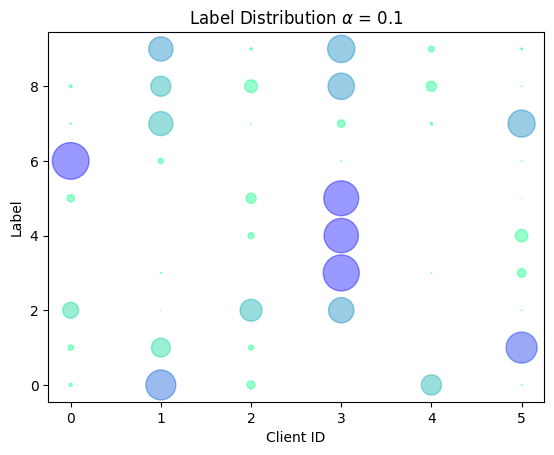

In [154]:
plot_class_distribution(subsets_dir)

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def plot_class_distribution_speed(subsets):
    class_labels = np.arange(10).astype(str)  # CIFAR10 class labels

    class_counts = np.zeros((len(subsets), 10), dtype=int)
    for i, subset in enumerate(subsets):
        targets = np.array([target for _, target in subset])
        class_counts[i] = np.bincount(targets, minlength=10)

    # Plotting
    num_subsets = len(subsets)
    num_classes = len(class_labels)

    x = np.repeat(np.arange(num_subsets), num_classes)
    y = np.tile(np.arange(num_classes), num_subsets)
    flattened_list = class_counts.flatten()

    fig, ax = plt.subplots()
    ax.scatter(x, y, flattened_list, alpha=0.4, cmap='viridis')

    plt.show()


/var/folders/rq/q7pyc51x2dvd2cvpry9lm6640000gq/T/ipykernel_27206/1749138914.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, flattened_list, alpha=0.4, cmap='viridis')


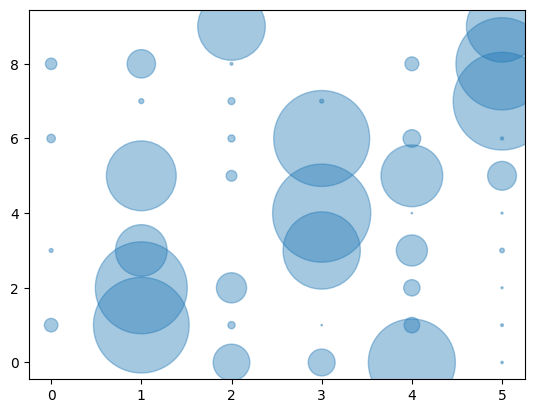

In [66]:
plot_class_distribution_speed(subsets_dir)

In [100]:
dataset_id = "cifar10"
num_classes = 10 if (dataset_id == "cifar10") else 100

In [118]:
lst = [50, 100, 100, 124, 300, 234, 543]


In [120]:
for i in range(len(lst)):
    lst[i] = lst[i] // 100

In [3]:
foo = {}
del foo

In [2]:
foo["test"].append(1)

KeyError: 'test'

In [5]:
num_devices = 6
foo = dict(zip(range(num_devices), [[] for _ in range(num_devices)]))

In [6]:
foo

{0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

In [10]:
device_dict = {0 : ['client1', 'client2', 'client3'], 1 : ['client4', 'client5', 'client6'], 2: ['client7', 'client8']}

In [11]:
device_dict

{0: ['client1', 'client2', 'client3'],
 1: ['client4', 'client5', 'client6'],
 2: ['client7', 'client8']}

In [17]:
# get element from each item in dict
for i, (key, value) in zip(range(3), device_dict.items()):
    print(i)

0
1
2


In [20]:
for i in range(3):
    for key, value in device_dict.items():
        if i < len(value):
            print(key, value[i])

0 client1
1 client4
2 client7
0 client2
1 client5
2 client8
0 client3
1 client6


In [21]:
for i in range(3):
    for values in zip(*device_dict.values()):
        if i < len(values):
            print(values[i])

client1
client2
client4
client5
client7
client8


In [19]:
device_ids = [0, 1, 2, 3]  # List of GPU device IDs to use

processes = []
for i, (model, device_id) in enumerate(zip(["model1", "model2", "model3", "model4", "model5", "model6", "model7", "model8"], device_ids)):
    print(i, model, device_id)

0 model1 0
1 model2 1
2 model3 2
3 model4 3


In [22]:
8//3

2

In [25]:
import math
math.ceil(8/3)

3

In [37]:
'''ResNet in PyTorch.

For Pre-activation ResNet, see 'preact_resnet.py'.

Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 128

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

In [32]:
test()

torch.Size([1, 10])


In [49]:
net = ResNet18()
y = net(torch.randn(1, 3, 63, 63))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2048 and 512x10)

In [48]:
y

tensor([[-0.4017, -0.3452,  0.3939,  0.7452,  0.1936, -0.0400,  0.4256,  0.7276,
         -0.2523,  0.3377]], grad_fn=<AddmmBackward0>)

In [43]:
y

tensor([[ 0.0951,  0.9426, -0.4347, -0.0144, -0.8422, -0.4137,  0.4417,  0.6024,
         -1.0984, -0.0241]], grad_fn=<AddmmBackward0>)

In [53]:
import torchvision
del model
model = torchvision.models.resnet18(pretrained=False, num_classes=10)

/Users/colin/miniconda3/envs/fed-diff/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/colin/miniconda3/envs/fed-diff/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [54]:
model(torch.randn(1, 3, 32, 32))

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 512, 1, 1])

In [1]:
from models import resnet

In [2]:
model = resnet.ResNet18(10)

In [4]:
import torch
model.eval()
model(torch.randn(1, 3, 32, 32))

tensor([[-0.5216, -0.2403, -0.0904,  0.1223, -0.3682, -0.3373, -0.2741, -0.0624,
         -0.0639, -0.3151]], grad_fn=<AddmmBackward0>)

In [7]:
params = {"lr": 0.1, "momentum": 0.9, "weight_decay": 5e-4}

In [8]:
params.lr

AttributeError: 'dict' object has no attribute 'lr'

In [13]:
from queue import Queue

q = Queue()
q.put(1)
q.put(2)
q.put(3)
q.put(4)

In [10]:
while not q.empty():
    print(q.get())

1
2
3
4


In [16]:
q.qsize()

4

In [12]:
q.get()

KeyboardInterrupt: 

In [18]:
foo = torch.randn(2500,10)
bar = torch.randn(2500,10)

In [19]:
tab = foo + bar

In [29]:
tab

tensor([[-0.4509,  0.2524, -0.2795,  ..., -0.7279,  1.1786, -2.3116],
        [ 0.9774, -0.2050, -2.1158,  ..., -0.0446, -0.5933,  0.8173],
        [ 0.3885, -2.5596,  0.8249,  ..., -0.0902,  0.7110,  0.0935],
        ...,
        [ 0.3329,  0.0884, -2.7811,  ..., -1.5071, -0.4921, -0.2631],
        [-1.2437, -0.5897,  1.1641,  ..., -0.8336, -1.9679,  1.5044],
        [-3.5503, -1.4101, -1.1366,  ..., -0.2942,  0.3493, -1.8073]])

In [30]:
baz = None

In [22]:
tew = baz + tab

TypeError: unsupported operand type(s) for +: 'NoneType' and 'Tensor'

In [23]:
for i in range(2):
    logg = torch.randn(2500,10)

# tensor of same shape as baz
tewx = torch.zeros_like(logg)

In [24]:
tewx.shape

torch.Size([2500, 10])

In [27]:
tewx+= tab

In [28]:
tewx

tensor([[-0.4509,  0.2524, -0.2795,  ..., -0.7279,  1.1786, -2.3116],
        [ 0.9774, -0.2050, -2.1158,  ..., -0.0446, -0.5933,  0.8173],
        [ 0.3885, -2.5596,  0.8249,  ..., -0.0902,  0.7110,  0.0935],
        ...,
        [ 0.3329,  0.0884, -2.7811,  ..., -1.5071, -0.4921, -0.2631],
        [-1.2437, -0.5897,  1.1641,  ..., -0.8336, -1.9679,  1.5044],
        [-3.5503, -1.4101, -1.1366,  ..., -0.2942,  0.3493, -1.8073]])

In [32]:
tewx/2

tensor([[-0.2254,  0.1262, -0.1398,  ..., -0.3640,  0.5893, -1.1558],
        [ 0.4887, -0.1025, -1.0579,  ..., -0.0223, -0.2967,  0.4087],
        [ 0.1943, -1.2798,  0.4125,  ..., -0.0451,  0.3555,  0.0467],
        ...,
        [ 0.1665,  0.0442, -1.3906,  ..., -0.7535, -0.2460, -0.1316],
        [-0.6218, -0.2949,  0.5821,  ..., -0.4168, -0.9839,  0.7522],
        [-1.7751, -0.7051, -0.5683,  ..., -0.1471,  0.1747, -0.9037]])

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np


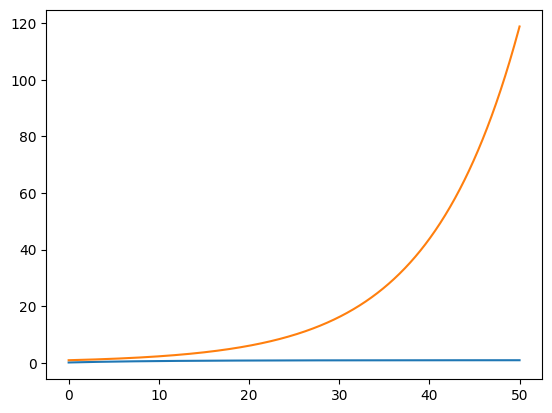

In [51]:
# plot exponential function from 0 to 50
# x = np.linspace(0, 50, 1000)
# y = np.exp(-x)
# plt.plot(x, y)
# more gradual exponential function
x = np.linspace(0, 50, 1000)
y = 1 - (0.1 + 0.8 * np.exp(-x/10))
plt.plot(x, y)
# y2 = 1 - (0.1 + 0.8 * np.log(-x/10))
# symetrical of y
y2 =  (0.1 + 0.8 * np.exp(x/10))
# exponential function from 0 to 50 between 0.1 and 0.9
y3 = 0.1 + 0.8 * np.exp(-x/10)
plt.plot(x, y2)
plt.show()

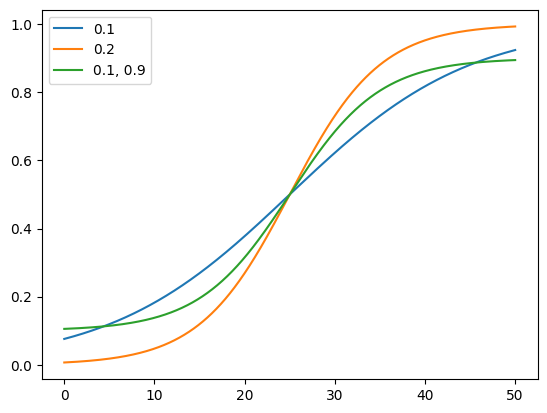

In [15]:
# plot sigmoid decay 
# plot sigmoid decay with different parameters
# plot sigmoid decay with different parameters and different initial values

x = np.linspace(0, 50, 1000)
y = 1 / (1 + np.exp(-0.1 * (x - 25)))
plt.plot(x, y)
y2 = 1 / (1 + np.exp(-0.2 * (x - 25)))
plt.plot(x, y2)
# plot with min 0.1 and max 0.9
y3 = 0.1 + 0.8 / (1 + np.exp(-0.2 * (x - 25)))
plt.plot(x, y3)
# add legend
plt.legend(['0.1', '0.2', '0.1, 0.9'])
plt.show()

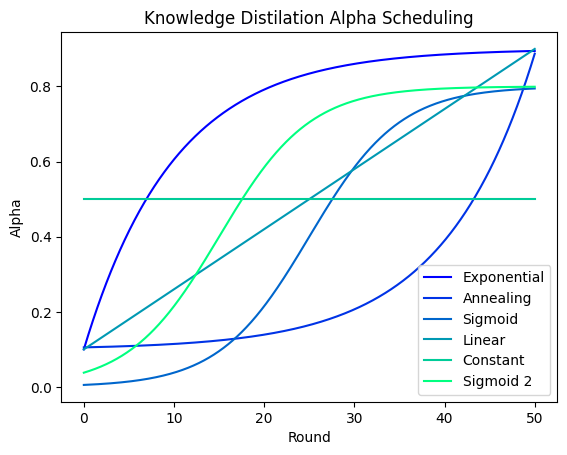

In [5]:
# KD alpha scheduling
x = np.linspace(0, 50, 1000)

exponential = 1 - (0.1 + 0.8 * np.exp(-x/10))
logarithmic = 0.1 + 0.1 * np.exp(0.1 * x) / 18.85
sigmoid = 0.8 / (1 + np.exp(-0.2 * (x - 25)))
linear = 0.1 + 0.8 * x / 50
constant = 0.5 * np.ones(1000)
sigmoid_2 = 0.8 / (1 + np.exp(-0.2 * (x - 15)))

n = 6
colors = plt.cm.winter(np.linspace(0, 1, n))

plt.plot(x, exponential, label="Exponential", color=colors[0])
plt.plot(x, logarithmic, label="Annealing", color=colors[1])
plt.plot(x, sigmoid, label="Sigmoid", color=colors[2])
plt.plot(x, linear, label="Linear", color=colors[3])
plt.plot(x, constant, label="Constant", color=colors[4])
plt.plot(x, sigmoid_2, label="Sigmoid 2", color=colors[5])
plt.legend()
plt.xlabel("Round")
plt.ylabel("Alpha")
plt.title("Knowledge Distilation Alpha Scheduling")
plt.show()

In [86]:
np.exp(0.1 * 29.3)

18.72763049667292

In [92]:
arg = "exponential"

In [ ]:
def get_alpha(x, kd_scheduling):

    assert kd_scheduling in [0, 1, 2, 3, 4, 5]

    if kd_scheduling == 0:
        # Constant
        alpha = 0.5
    elif kd_scheduling == 1:
        # Linear
        alpha = 0.1 + 0.8 * x / 50
    elif kd_scheduling == 2:
        # Cumulative Exponential
        alpha = 1 - (0.1 + 0.8 * np.exp(-x/10))
    elif kd_scheduling == 3:
        # Exponential
        alpha = 0.1 + 0.1 * np.exp(0.1 * x) / 18.85
    elif kd_scheduling == 4:
        # Sigmoid at 25
        alpha = 0.1 + 0.8 / (1 + np.exp(-0.2 * (x - 25)))
    elif kd_scheduling == 5:
        # Sigmoid at 15
        alpha = 0.1 + 0.8 / (1 + np.exp(-0.2 * (x - 15)))

    return round(alpha, 2)

In [ ]:
exponential = 1 - (0.1 + 0.8 * np.exp(-x/10))
logarithmic = 0.1 + 0.1 * np.exp(0.1 * x) / 18.85
sigmoid = 0.1 + 0.8 / (1 + np.exp(-0.2 * (x - 25)))
linear = 0.1 + 0.8 * x / 50
constant = 0.5 * np.ones(1000)

In [95]:
x = 12

In [97]:

round(1 - (0.1 + 0.8 * np.exp(-x/10)), 2)

0.66

In [3]:
import torch
from federated.Dataset import Dataset
from models.Models import Models

In [6]:
import torch
from federated.Dataset import Dataset
from models.Models import Models
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

model = Models.available['resnet18']()(num_classes=10).to('cuda')
dataset = Dataset(data_path="dataset\\cinic-10", dataset_id="cinic10", batch_size=128, kd_batch_size=128, num_clients=5, synthetic_path=None)
dataset.prepare_data("iid")
dataloader = dataset.client_dataloaders[0]
testloader = dataset.test_dataloader
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [11]:
for epoch in range(150):
    total_loss = 0
    total_correct = 0
    total = 0
    model.train()
    for batch_idx, (data, target) in enumerate(dataloader):
        model.train()
        data, target = data.to('cuda'), target.to('cuda')
        test_data, test_target = test_data.to('cuda'), test_target.to('cuda')
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total += target.size(0)
        total_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total_correct += (predicted == target).sum().item()
        # print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        #     epoch, batch_idx * len(data), len(dataloader.dataset),
        #     100. * batch_idx / len(dataloader), loss.item()))
    writer.add_scalar('Loss/train', total_loss/len(dataloader), epoch)
    writer.add_scalar('Accuracy/train', 100*total_correct/total, epoch)
    model.eval()    
    with torch.no_grad():
        test_total_loss = 0
        test_total_correct = 0
        test_total = 0
        for batch_idx, (data, target) in enumerate(testloader):
            data, target = data.to('cuda'), target.to('cuda')
            output = model(data)
            loss = criterion(output, target)

            test_total += target.size(0)
            test_total_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            test_total_correct += (predicted == target).sum().item()

        # Log statistics
        writer.add_scalar('Loss/test', test_total_loss/len(testloader), epoch)
        writer.add_scalar('Accuracy/test', 100*test_total_correct/test_total, epoch)
        writer.flush()


KeyboardInterrupt: 

In [1]:
import math
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.multiprocessing as mp
from torch.utils.data import DataLoader, TensorDataset
from queue import Queue
from multiprocessing import Queue as mpQueue
from federated.Client import Client
from federated.Dataset import Dataset
from federated.Server import Server
from models.Models import Models
from knowledge_distillation import Logits, SoftTarget
from models.ClientModelStrategy import ClientModelStrategy

# data_path = "dataset\\cinic-10"
# dataset_id = "cinic10"
# batch_size = 128
# kd_batch_size = 128
# num_clients = 5
# synthetic_path = "dataset\\cinic-10\\10K"
# data_partition = "iid"
# client_model = "strategy_1"

data_path = None
dataset_id = "emnist"
batch_size = 128
kd_batch_size = 128
num_clients = 5
synthetic_path = "None"
data_partition = "dirichlet"
client_model = "strategy_1"

dataset = Dataset(data_path, dataset_id, batch_size, kd_batch_size, num_clients, synthetic_path)
dataset.prepare_data(data_partition)


240000
Client 0 size: 51198
Client 1 size: 73122
Client 2 size: 13882
Client 3 size: 24741
Client 4 size: 77057


In [2]:
from torch.utils.tensorboard import SummaryWriter

logger = SummaryWriter(log_dir="runs/NameTest")

In [5]:

client_models = ClientModelStrategy.available[client_model](num_clients)

server_model = Models.available['cnn_medium']()(1,10)

for i in range(len(client_models)):
    torch.cuda.empty_cache()
    client = client_models[i]()
    client = client(1,10)
    client.to('cuda')

    opt = optim.SGD(client.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(25):
        client.train()
        total_loss = 0
        total_correct = 0
        total = 0
        for idx, (data, target) in enumerate(dataset.client_dataloaders[i]):
            data, target = data.to('cuda'), target.to('cuda')
            opt.zero_grad()
            output = client(data)
            loss = criterion(output, target)
            loss.backward()
            opt.step()
            total += target.size(0)
            total_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total_correct += (predicted == target).sum().item()

        logger.add_scalar(f'Train_loss/Client_{i}', total_loss/len(dataset.client_dataloaders[i]), epoch)
        logger.add_scalar(f'Train_accuracy/Client_{i}', 100*total_correct/total, epoch)

        if epoch % 5 == 0:
            client.eval()
            with torch.no_grad():
                test_total_loss = 0
                test_total_correct = 0
                test_total = 0
                for idx, (data, target) in enumerate(dataset.test_dataloader):
                    data, target = data.to('cuda'), target.to('cuda')
                    output = client(data)
                    loss = criterion(output, target)

                    test_total += target.size(0)
                    test_total_loss += loss.item()
                    _, predicted = torch.max(output.data, 1)
                    test_total_correct += (predicted == target).sum().item()

                logger.add_scalar(f'Test_loss/Client_{i}', test_total_loss/len(dataset.test_dataloader), epoch)
                logger.add_scalar(f'Test_accuracy/Client_{i}', 100*test_total_correct/test_total, epoch)
        logger.flush()

    torch.save({
            'model_state_dict': client.state_dict(),
            'optimizer_state_dict': opt.state_dict()
            },f"client_{i:02}.pt")
                    

KeyboardInterrupt: 

In [8]:
from torchvision.datasets import EMNIST
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])

emnist = EMNIST(root='./dataset', train=False, download=True, transform=transforms, split='digits')

In [5]:
for i in range(5):
    print(len(dataset.client_dataloaders[i]))

375
375
375
375
375


In [6]:
375*128

48000

In [3]:
for data in dataset.client_dataloaders[0]:
    

torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([128, 1, 32, 32])
torch.Size([12

KeyboardInterrupt: 

In [27]:
len(dataset.client_dataloaders[0])

375

In [17]:
import numpy as np
from torch.utils.data import DataLoader, Subset, random_split


In [18]:
def dirichlet_split(dataset, num_splits, beta=0.5):
    """
    Splits training data into client datasets based Dirichlet distribution

    Args:
        dataset (torch.utils.data.Dataset): training data
        num_splits (int): number of client datasets to split into
        beta (float): concentration parameter of Dirichlet distribution
    Returns:
        client_data (list): list of client datasets       
    """
    np.random.seed(42)
    label_distributions = []
    # Generate label distributions for each class using Dirichlet distribution
    for y in range(len(dataset.classes)):
        label_distributions.append(np.random.dirichlet(np.repeat(beta, num_splits)))

    labels = np.array(dataset.targets).astype(int)
    client_idx_map = {i: {} for i in range(num_splits)}
    client_size_map = {i: {} for i in range(num_splits)}

    for y in range(len(dataset.classes)):
        label_y_idx = np.where(labels == y)[0]
        label_y_size = len(label_y_idx)

        # Sample number of samples for each client from label distribution
        sample_size = (label_distributions[y] * label_y_size).astype(int)
        sample_size[num_splits - 1] += len(label_y_idx) - np.sum(sample_size)
        for i in range(num_splits):
            client_size_map[i][y] = sample_size[i]

        np.random.shuffle(label_y_idx)
        sample_interval = np.cumsum(sample_size)
        for i in range(num_splits):
            client_idx_map[i][y] = label_y_idx[(sample_interval[i - 1] if i > 0 else 0):sample_interval[i]]

    subsets = []
    for i in range(num_splits):
        client_i_idx = np.concatenate(list(client_idx_map[i].values()))
        np.random.shuffle(client_i_idx)
        subsets.append(Subset(dataset, client_i_idx))

    return subsets


In [19]:
dir_split = dirichlet_split(emnist, 5, 0.5)

In [24]:
loaders = []
for split in dir_split:
    loaders.append(DataLoader(split, batch_size=128, shuffle=True))
    

In [25]:
for loader in loaders:
    print(len(loader))

67
96
19
33
101
